In [2]:
!firefox /home/mrikum7/Downloads/4613.full.pdf

In [59]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os
from skimage.color import rgb2gray
from keras.utils import to_categorical

In [17]:
file = Image.open('../Datasets/xPLNET/DATASET/Training Samples/0/49445.png')

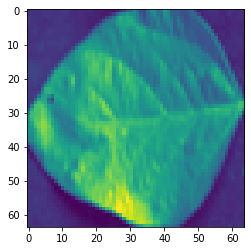

In [18]:
plt.imshow(rgb2gray(np.asarray(file)))

In [36]:
eight = []
for i, file in enumerate(os.listdir('../Datasets/xPLNET/DATASET/Training Samples/8')):
    if i < 100:
        data = Image.open('../Datasets/xPLNET/DATASET/Training Samples/8/' + file)
        data = np.asarray(data)
        eight.append(rgb2gray(data))

In [43]:
eight = np.asarray(eight)

In [28]:
one.shape

(100, 64, 64)

In [24]:
x_train = []

In [50]:
x_train.append(eight)

In [52]:
data = np.asarray(x_train)

In [57]:
x_train = data.reshape((900, 64, 64, 1))

In [77]:
x_train[0]

array([[[0.09972078],
        [0.09943804],
        [0.10252627],
        ...,
        [0.09974353],
        [0.09777137],
        [0.09608196]],

       [[0.10364235],
        [0.10478118],
        [0.10561451],
        ...,
        [0.09496588],
        [0.1014102 ],
        [0.09468314]],

       [[0.11737922],
        [0.10589725],
        [0.10953608],
        ...,
        [0.09860471],
        [0.10057686],
        [0.09748863]],

       ...,

       [[0.10870275],
        [0.10057686],
        [0.1014102 ],
        ...,
        [0.10169294],
        [0.09833686],
        [0.10085961]],

       [[0.10870275],
        [0.10449843],
        [0.09551647],
        ...,
        [0.10309176],
        [0.10309176],
        [0.09833686]],

       [[0.10644784],
        [0.10169294],
        [0.09832196],
        ...,
        [0.10197569],
        [0.10644784],
        [0.09888745]]])

In [60]:
y = [0 for i in range(100)]

In [68]:
y.extend([8 for i in range(100)])

In [71]:
y = to_categorical(y)

In [74]:
y_train = y

In [90]:
model = keras.Sequential()

In [91]:
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu',
                              input_shape = (64, 64, 1)))

In [92]:
model.add(keras.layers.MaxPool2D((2, 2)))

In [93]:
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))

In [94]:
model.add(keras.layers.MaxPool2D((2, 2)))

In [95]:
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))

In [96]:
model.add(keras.layers.MaxPool2D((2, 2)))

In [97]:
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))

In [98]:
model.add(keras.layers.Flatten())

In [99]:
model.add(keras.layers.Dense(500, activation = 'relu'))

In [100]:
model.add(keras.layers.Dense(100, activation = 'relu'))

In [101]:
model.add(keras.layers.Dense(9, activation = 'softmax'))

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)         

In [103]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [104]:
model.fit(x_train, y_train, epochs = 50, batch_size = 64)

Train on 900 samples
Epoch 1/50
900/900 [==============================] - 8s 8ms/sample - loss: 2.1972 - accuracy: 0.1078
Epoch 2/50
900/900 [==============================] - 1s 1ms/sample - loss: 2.1770 - accuracy: 0.1367
Epoch 3/50
900/900 [==============================] - 1s 1ms/sample - loss: 2.1129 - accuracy: 0.1689
Epoch 4/50
900/900 [==============================] - 1s 1ms/sample - loss: 2.0807 - accuracy: 0.2167
Epoch 5/50
900/900 [==============================] - 1s 1ms/sample - loss: 2.0355 - accuracy: 0.2089
Epoch 6/50
900/900 [==============================] - 1s 2ms/sample - loss: 1.9614 - accuracy: 0.2511
Epoch 7/50
900/900 [==============================] - 2s 2ms/sample - loss: 1.9502 - accuracy: 0.2556
Epoch 8/50
900/900 [==============================] - 2s 2ms/sample - loss: 2.0027 - accuracy: 0.2433
Epoch 9/50
900/900 [==============================] - 2s 2ms/sample - loss: 1.8851 - accuracy: 0.2833
Epoch 10/50
900/900 [==============================] - 2s 2ms